#Import libraries

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Import Dataset

In [2]:
from google.colab import files
uploaded = files.upload()

Saving dataset_falcon9.csv to dataset_falcon9.csv


#Read the data

In [3]:
df = pd.read_csv('dataset_falcon9.csv')

#Exploratory Data Analysis

First, let's try to see how the FlightNumber (indicating the continuous launch attempts.) and Payload variables would affect the launch outcome.

We can plot out the FlightNumber vs. PayloadMassand overlay the outcome of the launch. We see that as the flight number increases, the first stage is more likely to land successfully. The payload mass is also important; it seems the more massive the payload, the less likely the first stage will return.

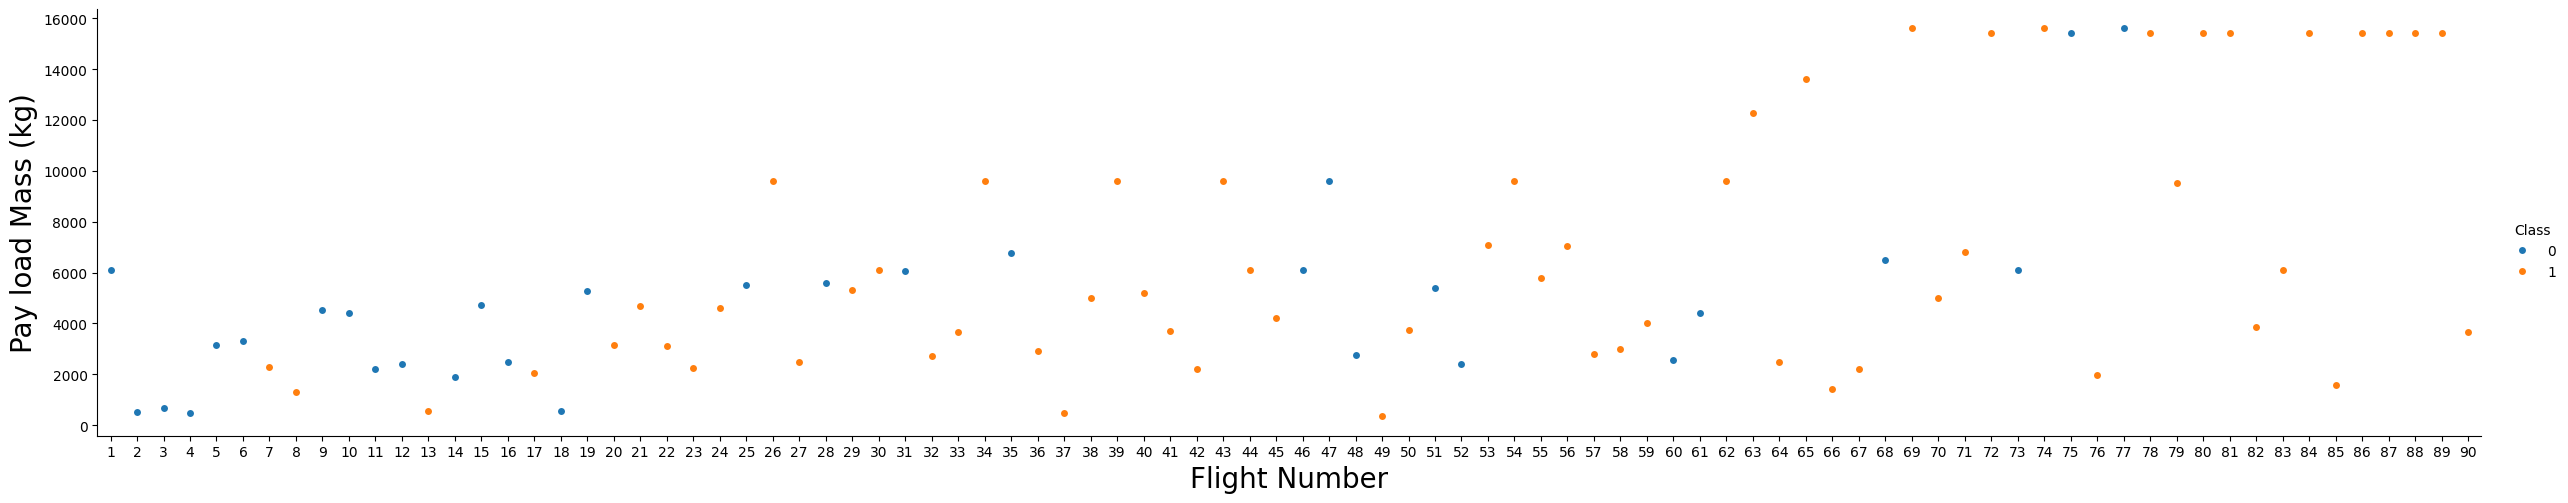

In [12]:
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

**TASK 1: Visualize the relationship between Flight Number and Launch Site**



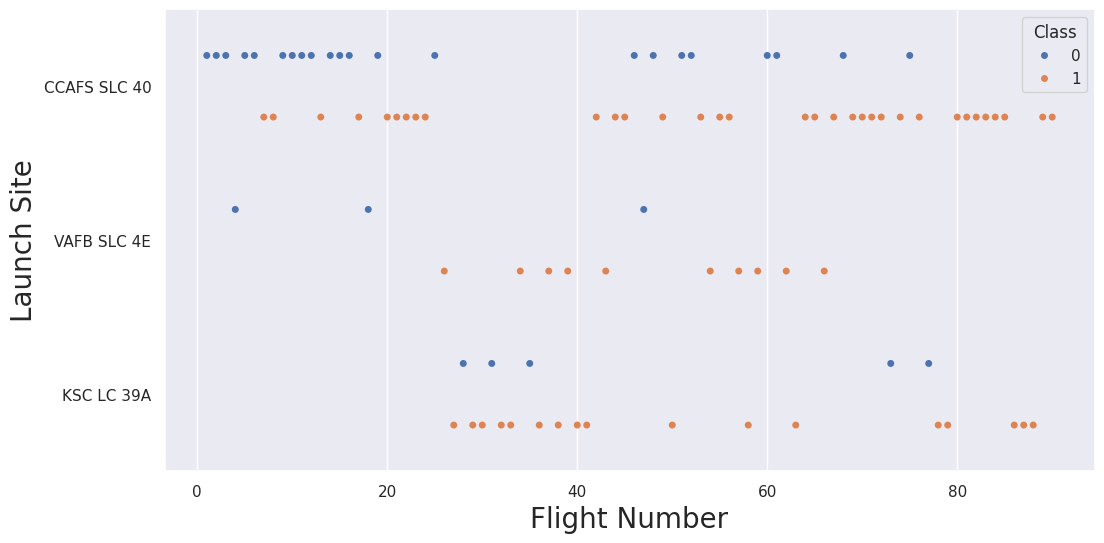

In [15]:
sns.set_theme(color_codes=True)
plt.figure(figsize=(14,8))
sns.scatterplot(x="FlightNumber", y="LaunchSite", hue="Class", data = df, dodge=True)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Launch Site",fontsize=20)
plt.show()

Explain the patterns - found in the Flight Number vs. Launch Site:

*With more flight numbers (after 40) higher the success rate for the Rocket is increasing.

*But theres no clear pattern to make a decision if the Flight Number is
dependant on Launch Site for a success launch.

**TASK 2: Visualize the relationship between Payload Mass and Launch Site**

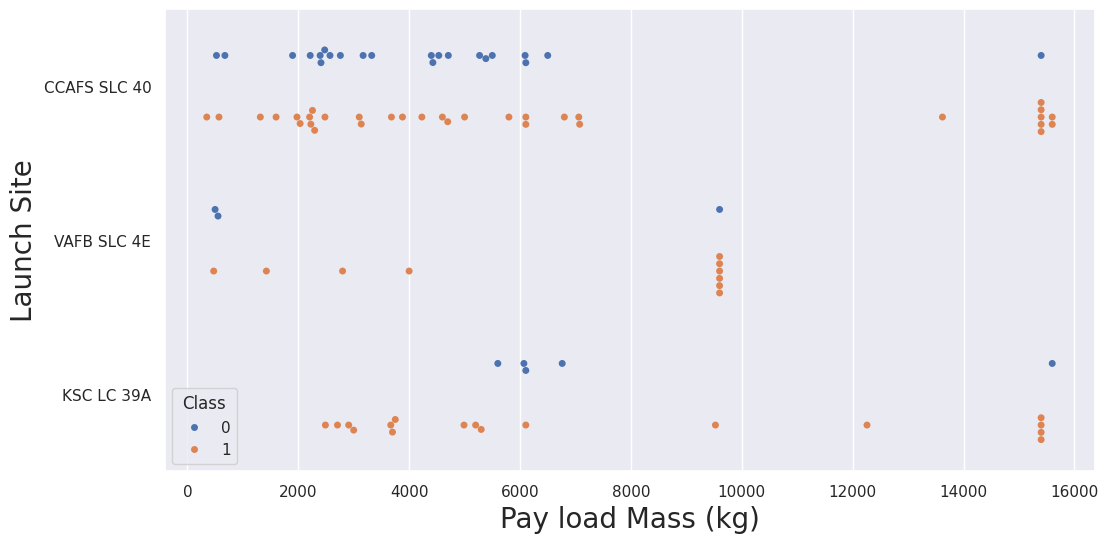

In [17]:
sns.set_theme(color_codes=True)
plt.figure(figsize=(12,6))
sns.swarmplot(x="PayloadMass", y="LaunchSite", hue="Class", data=df, dodge=True)
plt.xlabel("Pay load Mass (kg)",fontsize=20)
plt.ylabel("Launch Site",fontsize=20)
plt.show()

* Smaller payloads have a mix of failures and successes across all sites.
* Higher payloads (12,000+ kg) tend to have a higher success rate, particularly at KSC LC 39A and CCAFS SLC 40.
* VAFB SLC 4E has the least number of launches and a relatively lower success rate, but a notable success occurred for payloads between 8,000 and 10,000 kg


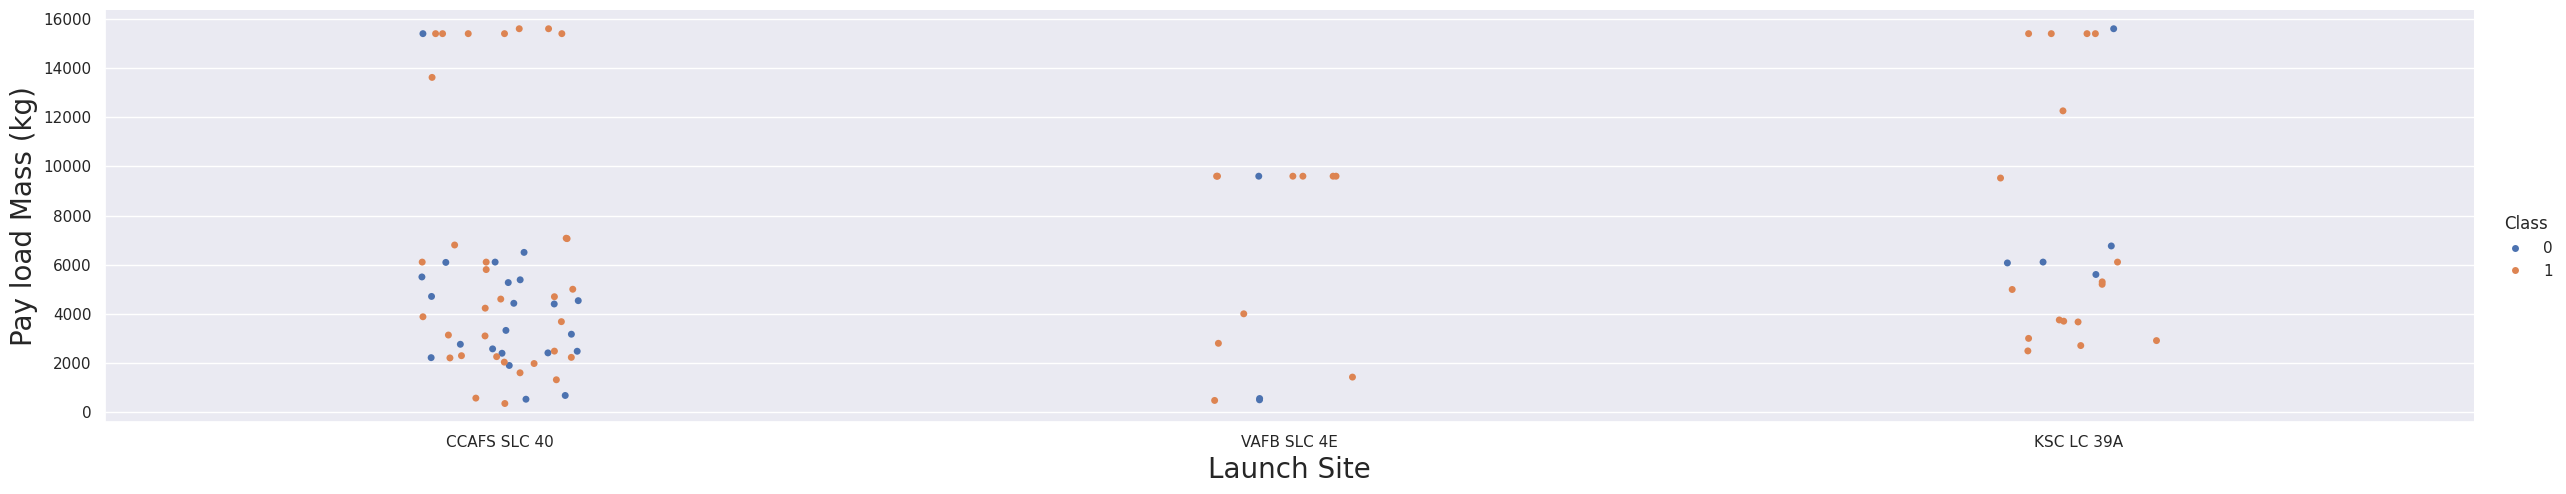

In [32]:
sns.catplot(y="PayloadMass", x="LaunchSite", hue="Class", data=df, aspect = 5)
plt.xlabel("Launch Site",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

**TASK 3: Visualize the relationship between success rate of each orbit type**

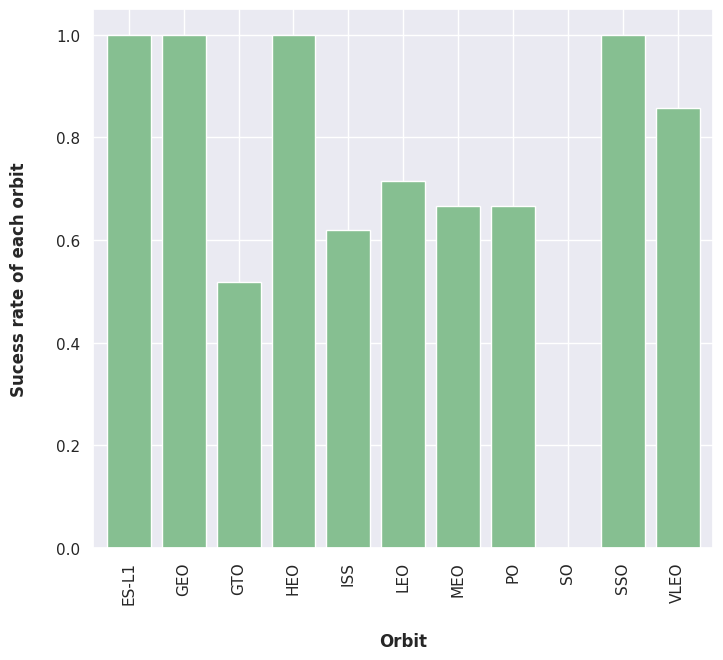

In [18]:
xh = df.groupby('Orbit')['Class'].mean()
ax = xh.plot(kind='bar', figsize=(8, 7), color='#86bf91', zorder=2, width=0.8)
ax.set_xlabel("Orbit", labelpad=20, weight='bold', size=12)
ax.set_ylabel("Sucess rate of each orbit", labelpad=20, weight='bold', size=12);

**TASK 4: Visualize the relationship between FlightNumber and Orbit type**

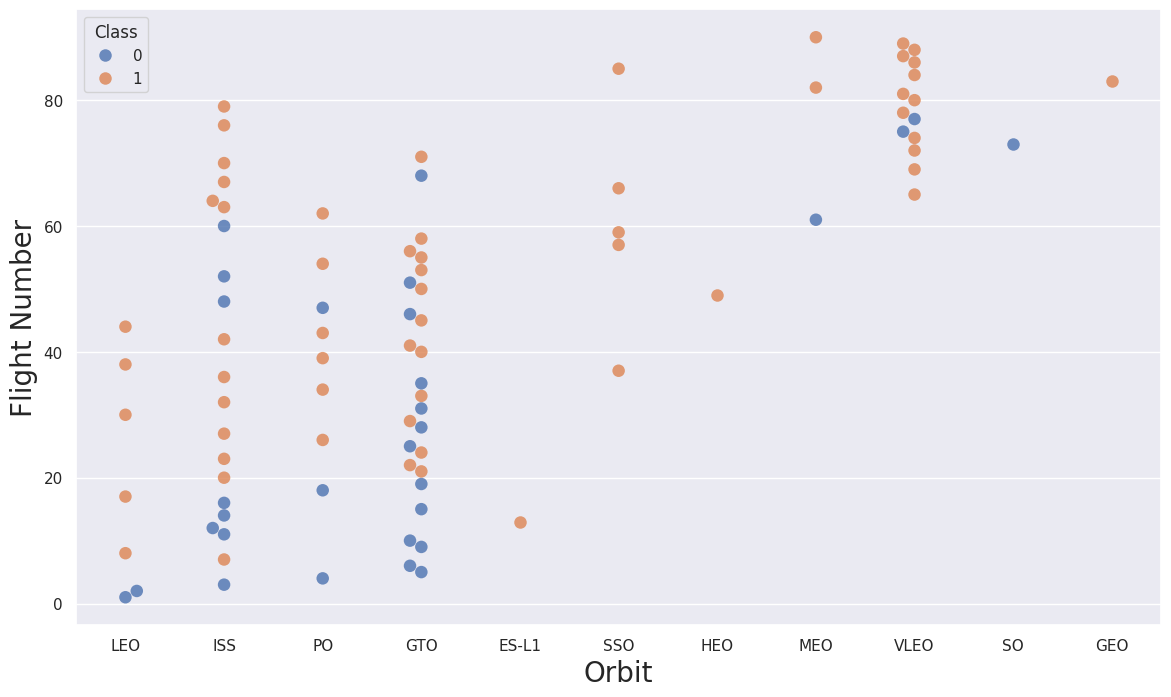

In [28]:
sns.set_theme(color_codes=True)
plt.figure(figsize=(14,8))
sns.swarmplot(x="Orbit", y="FlightNumber", hue="Class", data=df, dodge=False, alpha=.8, size=9)
plt.xlabel("Orbit",fontsize=20)
plt.ylabel("Flight Number",fontsize=20)
plt.show()

**TASK 5: Visualize the relationship between Payload and Orbit type**

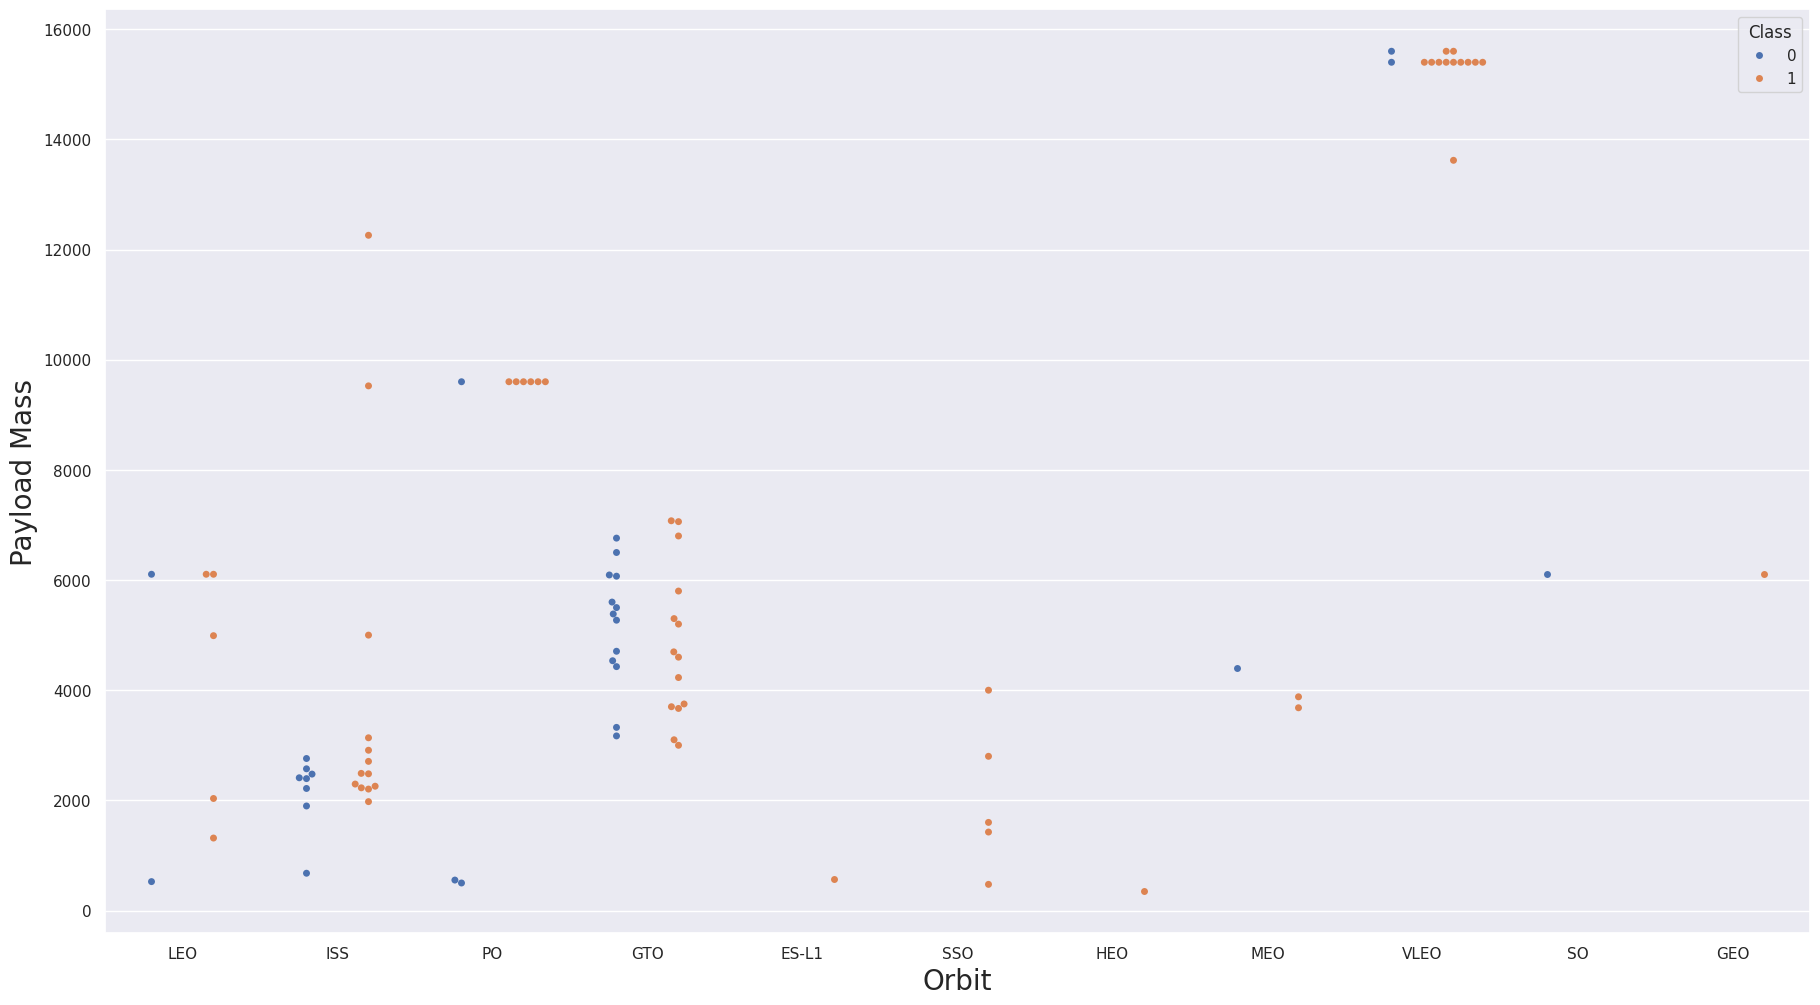

In [29]:
sns.set_theme(color_codes=True)
plt.figure(figsize=(22,12))
sns.swarmplot(x="Orbit", y="PayloadMass", hue="Class", data=df, dodge=True)
plt.xlabel("Orbit",fontsize=20)
plt.ylabel("Payload Mass",fontsize=20)
plt.show()

**TASK 6: Visualize the launch success yearly trend**

In [30]:
# A function to Extract years from the date
year=[]
def Extract_year(date):
    for i in df["Date"]:
        year.append(i.split("-")[0])
    return year

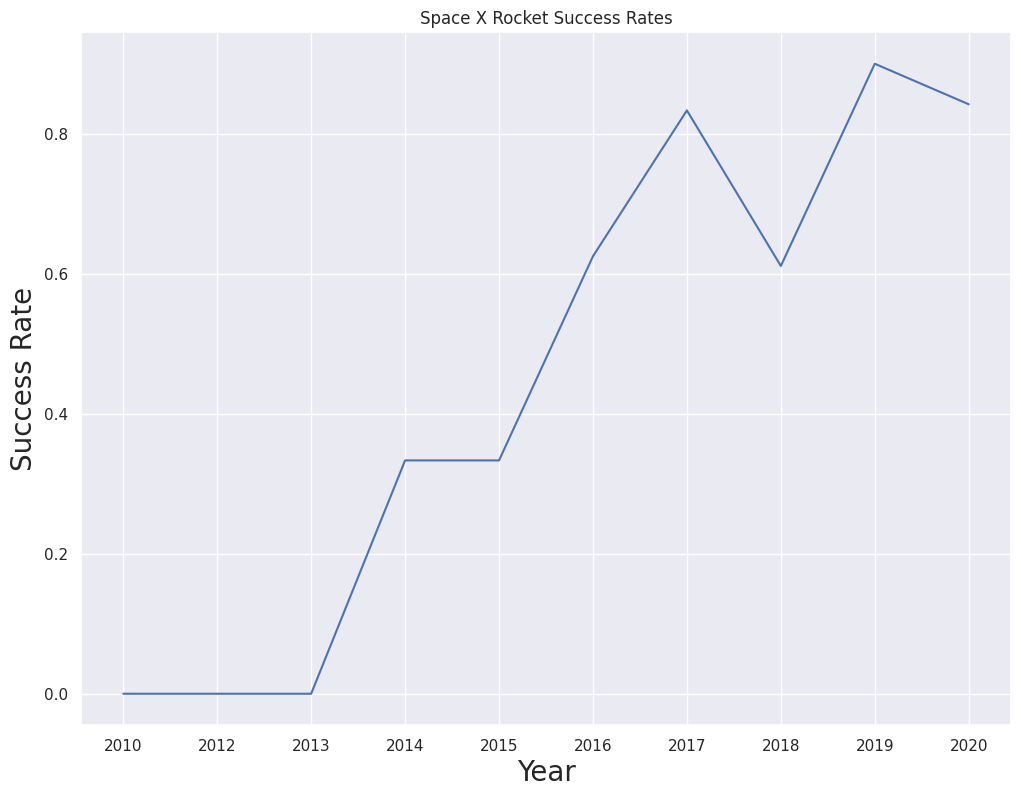

In [31]:
df['year']=Extract_year(df["Date"])
df_groupby_year=df.groupby("year",as_index=False)["Class"].mean()
sns.set(rc={'figure.figsize':(12,9)})
sns.lineplot(data=df_groupby_year, x="year", y="Class" )
plt.xlabel("Year",fontsize=20)
plt.title('Space X Rocket Success Rates')
plt.ylabel("Success Rate",fontsize=20)
plt.show()